In [47]:
import os
import torch
import matplotlib.pyplot as plt
from bball3_env import BBall3Env
import numpy as np



def do_rollout(init_point=None, render=False, video=False):
    #env = gym.make(env_name, **env_config)
    torch.autograd.set_grad_enabled(False)
    obs = env.reset()
    obs = torch.as_tensor(obs, dtype=torch.float32)

    acts_list = []
    obs1_list = []
    rews_list = []

    dtype = torch.float32
    act_size = env.action_space.shape[0]
    obs_size = env.observation_space.shape[0]

    done = False
    cur_step = 0

    while not done:
        acts = agent.model.select_action(obs, np.zeros((1,act_size)))[0]
        obs, rew, done, out = env.step(acts)
          
        obs1_list.append(obs)
        obs = torch.as_tensor(obs, dtype=dtype)

        acts_list.append(torch.as_tensor(acts))
        rews_list.append(torch.as_tensor(rew, dtype=dtype))
        cur_step += 1

    ep_obs1 = torch.tensor(obs1_list)
    ep_acts = torch.stack(acts_list)
    ep_rews = torch.stack(rews_list)
    torch.autograd.set_grad_enabled(True)

    return ep_obs1, ep_acts, ep_rews

In [48]:
#bball/python/data_sac/tn0/seed3066375725/reward_fn.py
trial_dir = "/home/sgillen/work/bball/python/data_sac/tn0"
agent_list = []
for entry in os.scandir(trial_dir):
    exec(open(entry.path + "/reward_fn.py").read()) # reward_fn defined here
    agent = torch.load(entry.path + "/agent.ag")
    agent_list.append(agent)
    
env = BBall3Env(**agent.env_config)

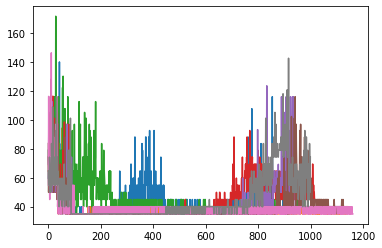

In [35]:
for agent in agent_list:
    plt.plot(agent.raw_rew_hist)
    
    
# min_length = int(min_length)
# rewards = np.zeros((min_length, len(ws_list)))
# for i, ws in enumerate(ws_list):
#     rewards[:, i] = np.array(ws["raw_rew_hist"][:min_length])

In [55]:
obs_hist, act_hist, rew_hist = do_rollout()

In [58]:
env.eng.clf()
obs_list = []
for obs in obs_hist:
    obs_list.append(obs.tolist())
import matlab
tout = matlab.single([float(i) for i in range(obs_hist.shape[0])])
env.animate(tout,matlab.single(obs_list))